In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
df = pd.read_csv("FeatureSet.csv")
df = df[df.name != "name"]
df.columns

Index(['name', 'SDx', 'SDy', 'SDz', 'SR', 'PFD_t', 'PFD_i', 'PFD_m', 'PFD_r',
       'PFD_p', 'FA_ti', 'FA_im', 'FA_mr', 'FA_rp', 'FA_pt', 'FD_ti', 'FD_tm',
       'FD_tr', 'FD_tp', 'FD_im', 'FD_ir', 'FD_ip', 'FD_mr', 'FD_mp', 'FD_rp'],
      dtype='object')

In [3]:
createLabels = pd.DataFrame(df,columns=['name'])
createLabels.rename(columns={'name':'0'},inplace = True)
for index,row in createLabels.iterrows():
    createLabels.set_value(index,'0',row['0'][0])
createLabels.to_csv("labelsForTestAndTrain.csv")

In [4]:
# createLabels['0'] = createLabels['0'].replace({'A': 0})

In [5]:
createLabels['0'].value_counts()

G    2635
A    2495
H    2412
F    2235
Q    2134
K    1836
E    1835
I    1797
U    1787
V    1781
X    1779
S    1773
C    1771
W    1758
L    1753
R    1718
T    1668
B    1531
D    1317
Y    1304
M    1278
O    1275
N    1247
P    1134
Name: 0, dtype: int64

In [6]:
null_data = df[df.isnull().any(axis=1)]
null_data

,name,SDx,SDy,SDz,SR,PFD_t,PFD_i,PFD_m,PFD_r,PFD_p,...,FD_ti,FD_tm,FD_tr,FD_tp,FD_im,FD_ir,FD_ip,FD_mr,FD_mp,FD_rp


In [7]:
le = preprocessing.LabelEncoder()
le.fit(createLabels['0'])
LabelEncoder()
list(le.classes_)

# letter_mappings = dict()
# # create csv of letter to label mappings
# for i in range(0, len(le.classes_)):
#     letter_mappings[le.classes_[i]] = i
# letter_mappings

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

In [8]:
transformedLabels = le.transform(createLabels['0']) 
np.unique(transformedLabels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [9]:
df['labels'] = transformedLabels
df

,name,SDx,SDy,SDz,SR,PFD_t,PFD_i,PFD_m,PFD_r,PFD_p,...,FD_tm,FD_tr,FD_tp,FD_im,FD_ir,FD_ip,FD_mr,FD_mp,FD_rp,labels
0,A,0,0,0,39.966454,65.68247223,42.25735092,39.53249741,38.18823242,36.1175499,...,76.21340942,85.34728241,90.24915314,11.8044014,24.71258163,36.29802704,13.00984859,25.18949127,13.1850338,0
1,A,0,0,0,39.921204,65.71134949,42.21065521,39.51726913,38.18833923,36.08570099,...,76.2060318,85.31578064,90.19330597,11.74165726,24.60841179,36.18247223,12.96681595,25.14378357,13.18447018,0
2,A,0,0,0,39.935287,65.77094269,42.21605682,39.5098114,38.17609787,36.064888,...,76.29174805,85.39203644,90.25740814,11.72393799,24.58503914,36.15388489,12.95946312,25.12979889,13.17900753,0
3,A,0,0,0,39.967155,65.8433609,42.23695755,39.51960754,38.17160416,36.04912186,...,76.42317963,85.51132965,90.35941315,11.69997978,24.56323814,36.12700272,12.96065617,25.12357712,13.17239475,0
4,A,0,0,0,39.994167,65.89459229,42.26105118,39.5322113,38.16578674,36.02653122,...,76.55688477,85.62385559,90.44404602,11.67207813,24.53340912,36.08757782,12.95788574,25.10881805,13.16216469,0
5,A,0,0,0,40.023067,65.94889832,42.28753662,39.54045105,38.15693665,36.00516129,...,76.6867218,85.73662567,90.53258514,11.64575958,24.5088253,36.05600357,12.95812893,25.09826469,13.15334511,0
6,A,0,0,0,40.064312,66.01991272,42.32112885,39.5579567,38.15302658,35.98649979,...,76.85216522,85.88206482,90.65262604,11.61876392,24.48489189,36.02697372,12.96018314,25.09208107,13.14688492,0
7,A,0,0,0,40.10849,66.09526062,42.35594559,39.57608795,38.15177917,35.97392654,...,77.01221466,86.02840424,90.77851868,11.59159756,24.46573067,36.00362015,12.96696091,25.09096146,13.14044476,0
8,A,0,0,0,40.148182,66.16746521,42.37995529,39.5772934,38.14015198,35.95747375,...,77.15331268,86.1601181,90.89639282,11.5657444,24.4471035,35.98360062,12.97199631,25.08947754,13.13509083,0
9,A,0,0,0,40.20046,66.27418518,42.397892,39.58076859,38.13147354,35.94592285,...,77.32865906,86.3273468,91.05570221,11.5367775,24.42334747,35.95976257,12.97562885,25.08859634,13.1308136,0


In [10]:
# #One Hot encoding
# df['name'] = pd.Categorical(df['name'])
# dfDummies = pd.get_dummies(df['name'], prefix = 'letter')
# df = pd.concat([df, dfDummies], axis=1)
# df

# SVM

In [11]:
df = df.drop(columns=['name'])

In [12]:
df = df.apply(pd.to_numeric, errors='coerce')

In [13]:
#Normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])
df.head()

C:\Users\Brian Pacia\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,SDx,SDy,SDz,SR,PFD_t,PFD_i,PFD_m,PFD_r,PFD_p,FA_ti,...,FD_tm,FD_tr,FD_tp,FD_im,FD_ir,FD_ip,FD_mr,FD_mp,FD_rp,labels
0,0.0,0.0,0.0,0.141116,0.454736,0.161677,0.185541,0.181455,0.152197,0.245220,...,0.510960,0.514233,0.503247,0.068935,0.145580,0.154723,0.060413,0.191405,0.105436,0
1,0.0,0.0,0.0,0.140656,0.455077,0.161172,0.185365,0.181457,0.151733,0.245607,...,0.510910,0.514028,0.502904,0.068365,0.144737,0.153675,0.060059,0.191013,0.105431,0
2,0.0,0.0,0.0,0.140799,0.455779,0.161230,0.185279,0.181291,0.151430,0.245796,...,0.511492,0.514523,0.503298,0.068204,0.144548,0.153416,0.059999,0.190893,0.105386,0
3,0.0,0.0,0.0,0.141123,0.456633,0.161456,0.185392,0.181230,0.151200,0.246139,...,0.512385,0.515297,0.503924,0.067986,0.144372,0.153172,0.060009,0.190840,0.105330,0
4,0.0,0.0,0.0,0.141398,0.457237,0.161717,0.185538,0.181151,0.150871,0.246510,...,0.513293,0.516027,0.504444,0.067732,0.144131,0.152815,0.059986,0.190713,0.105244,0


In [14]:
#Scale


size = len(df.columns)
for i, row in df.iterrows():
    max = np.max(row[:-1])
    for index, val in enumerate(row):
        if (index < size - 1):
            #print("Val ",val)
            #print("Max ",max)
            scaled =  val / max
            df.set_value(i,df.columns[index],scaled)
            #print(row)
        

#scaleFeatures(df)
df

,SDx,SDy,SDz,SR,PFD_t,PFD_i,PFD_m,PFD_r,PFD_p,FA_ti,...,FD_tm,FD_tr,FD_tp,FD_im,FD_ir,FD_ip,FD_mr,FD_mp,FD_rp,labels
0,0.0,0.0,0.0,0.274421,0.884301,0.314404,0.360812,0.352866,0.295970,0.476865,...,0.993636,1.000000,0.978637,0.134055,0.283101,0.300881,0.117482,0.372214,0.205036,0
1,0.0,0.0,0.0,0.273634,0.885315,0.313546,0.360612,0.353009,0.295185,0.477808,...,0.993934,1.000000,0.978360,0.132998,0.281574,0.298963,0.116841,0.371600,0.205108,0
2,0.0,0.0,0.0,0.273649,0.885829,0.313358,0.360098,0.352347,0.294312,0.477715,...,0.994109,1.000000,0.978184,0.132557,0.280936,0.298172,0.116611,0.371010,0.204822,0
3,0.0,0.0,0.0,0.273868,0.886155,0.313326,0.359777,0.351699,0.293424,0.477664,...,0.994349,1.000000,0.977929,0.131935,0.280172,0.297251,0.116455,0.370349,0.204407,0
4,0.0,0.0,0.0,0.274013,0.886071,0.313389,0.359551,0.351049,0.292371,0.477708,...,0.994702,1.000000,0.977552,0.131257,0.279308,0.296138,0.116246,0.369579,0.203951,0
5,0.0,0.0,0.0,0.274195,0.886055,0.313500,0.359227,0.350320,0.291354,0.477659,...,0.995000,1.000000,0.977220,0.130608,0.278528,0.295164,0.116085,0.368881,0.203519,0
6,0.0,0.0,0.0,0.274506,0.886057,0.313630,0.358964,0.349579,0.290298,0.477181,...,0.995357,1.000000,0.976862,0.129896,0.277646,0.294118,0.115906,0.368106,0.203044,0
7,0.0,0.0,0.0,0.274870,0.886147,0.313783,0.358712,0.348906,0.289413,0.476783,...,0.995631,1.000000,0.976564,0.129182,0.276839,0.293171,0.115801,0.367413,0.202568,0
8,0.0,0.0,0.0,0.275196,0.886328,0.313767,0.358148,0.348028,0.288475,0.476425,...,0.995837,1.000000,0.976350,0.128517,0.276094,0.292340,0.115690,0.366784,0.202148,0
9,0.0,0.0,0.0,0.275645,0.886897,0.313486,0.357479,0.347077,0.287551,0.475558,...,0.996050,1.000000,0.976193,0.127743,0.275149,0.291315,0.115506,0.366005,0.201658,0


In [15]:
X = df.drop('labels', axis=1)  
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,test_size = 0.30)  

In [16]:
svclassifier = SVC(kernel='linear')  

In [17]:
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [18]:
y_pred = svclassifier.predict(X_test)  
y_pred

array([11,  7,  3, ...,  7, 23,  7])

In [19]:
metrics.accuracy_score(y_pred,y_test)


0.9709687598611549

In [20]:
scores = cross_val_score(svclassifier, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.88 (+/- 0.10)


In [21]:
# for i in range(len(y_pred)):
#     if(y_pred[i]  != y_test[i]):
#         print(y_pred[i] + " was recognized as " + y_test[i])

In [22]:
###Testing on new data (entire alphabet)
dfTest4 = pd.read_csv("TestSetLight.csv")
dfTest4 = dfTest4[dfTest4.name != "name"]


labelsForTest4 = pd.DataFrame(dfTest4,columns=['name'])
labelsForTest4.rename(columns={'name':'0'},inplace = True)
for index,row in labelsForTest4.iterrows():
    labelsForTest4.set_value(index,'0',row['0'][0])
labelsForTest4.to_csv("labelsForFeatureSet4.csv")

dfTest4 = dfTest4.drop(columns=['name'])
dfTest4 = dfTest4.apply(pd.to_numeric, errors='coerce')

dfTest4

,SDx,SDy,SDz,SR,PFD_t,PFD_i,PFD_m,PFD_r,PFD_p,FA_ti,...,FD_ti,FD_tm,FD_tr,FD_tp,FD_im,FD_ir,FD_ip,FD_mr,FD_mp,FD_rp
0,0,0,0,40.490140,74.809883,41.099361,39.744900,38.208385,37.148186,0.380009,...,66.350243,77.584206,88.191681,96.313507,11.920159,24.317837,35.866856,12.707335,24.994482,12.986700
1,0,0,0,40.400400,74.704178,41.123497,39.829453,38.275909,37.202744,0.381778,...,66.083550,77.332359,87.940262,96.097351,11.912261,24.289377,35.863914,12.697207,25.014748,13.017045
2,0,0,0,40.400400,74.704178,41.123497,39.829453,38.275909,37.202744,0.381778,...,66.083550,77.332359,87.940262,96.097351,11.912261,24.289377,35.863914,12.697207,25.014748,13.017045
3,0,0,0,40.377377,74.666588,41.130318,39.847527,38.292812,37.214622,0.381946,...,66.008110,77.259720,87.870277,96.031929,11.910706,24.286022,35.863094,12.697122,25.018591,13.020507
4,0,0,0,40.355698,74.623039,41.135891,39.863117,38.308064,37.224716,0.382028,...,65.930923,77.186882,87.799927,95.965408,11.911616,24.285583,35.865589,12.697319,25.023176,13.024735
5,0,0,0,40.355698,74.623039,41.135891,39.863117,38.308064,37.224716,0.382028,...,65.930923,77.186882,87.799927,95.965408,11.911616,24.285583,35.865589,12.697319,25.023176,13.024735
6,0,0,0,40.338608,74.585312,41.141792,39.879604,38.324856,37.237362,0.382166,...,65.871574,77.131058,87.744171,95.911217,11.912505,24.283585,35.864456,12.695920,25.023611,13.026100
7,0,0,0,40.322506,74.553764,41.152306,39.899006,38.344883,37.252377,0.382389,...,65.821083,77.081528,87.696396,95.862701,11.911469,24.281836,35.861114,12.696233,25.022772,13.024633
8,0,0,0,40.322506,74.553764,41.152306,39.899006,38.344883,37.252377,0.382389,...,65.821083,77.081528,87.696396,95.862701,11.911469,24.281836,35.861114,12.696233,25.022772,13.024633
9,0,0,0,40.311430,74.529610,41.163876,39.914566,38.360352,37.262833,0.382429,...,65.783241,77.043777,87.659576,95.826042,11.911031,24.280609,35.860119,12.695786,25.022394,13.025059


In [23]:
#Normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dfTest4[dfTest4.columns] = scaler.fit_transform(dfTest4[dfTest4.columns])
dfTest4.head()

C:\Users\Brian Pacia\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,SDx,SDy,SDz,SR,PFD_t,PFD_i,PFD_m,PFD_r,PFD_p,FA_ti,...,FD_ti,FD_tm,FD_tr,FD_tp,FD_im,FD_ir,FD_ip,FD_mr,FD_mp,FD_rp
0,0.0,0.0,0.0,0.112267,0.443268,0.092092,0.060404,0.149433,0.147594,0.340781,...,0.400930,0.632700,0.631723,0.725615,0.078873,0.105793,0.131160,0.049711,0.064418,0.035920
1,0.0,0.0,0.0,0.111316,0.441326,0.092426,0.061800,0.150518,0.148869,0.342523,...,0.399122,0.630443,0.629689,0.723450,0.078793,0.105529,0.131127,0.049631,0.064650,0.036231
2,0.0,0.0,0.0,0.111316,0.441326,0.092426,0.061800,0.150518,0.148869,0.342523,...,0.399122,0.630443,0.629689,0.723450,0.078793,0.105529,0.131127,0.049631,0.064650,0.036231
3,0.0,0.0,0.0,0.111072,0.440636,0.092521,0.062099,0.150790,0.149146,0.342689,...,0.398611,0.629793,0.629123,0.722795,0.078778,0.105498,0.131117,0.049630,0.064693,0.036267
4,0.0,0.0,0.0,0.110842,0.439836,0.092598,0.062356,0.151035,0.149382,0.342769,...,0.398088,0.629140,0.628554,0.722129,0.078787,0.105494,0.131145,0.049632,0.064746,0.036310


In [24]:
#Scale


size = len(dfTest4.columns)
for i, row in dfTest4.iterrows():
    max = np.max(row)
    for index, val in enumerate(row):
        if (index < size):
            #print("Val ",val)
            #print("Max ",max)
            scaled =  val / max
            dfTest4.set_value(i,dfTest4.columns[index],scaled)
            #print(row)
        

#scaleFeatures(df)
dfTest4

,SDx,SDy,SDz,SR,PFD_t,PFD_i,PFD_m,PFD_r,PFD_p,FA_ti,...,FD_ti,FD_tm,FD_tr,FD_tp,FD_im,FD_ir,FD_ip,FD_mr,FD_mp,FD_rp
0,0.0,0.0,0.0,0.154720,0.610886,0.126916,0.083246,0.205940,0.203405,0.469645,...,0.552538,0.871949,0.870604,1.000000,0.108698,0.145798,0.180757,0.068508,0.088777,0.049503
1,0.0,0.0,0.0,0.153868,0.610030,0.127757,0.085425,0.208056,0.205776,0.473457,...,0.551693,0.871440,0.870397,1.000000,0.108913,0.145870,0.181252,0.068603,0.089363,0.050081
2,0.0,0.0,0.0,0.153868,0.610030,0.127757,0.085425,0.208056,0.205776,0.473457,...,0.551693,0.871440,0.870397,1.000000,0.108913,0.145870,0.181252,0.068603,0.089363,0.050081
3,0.0,0.0,0.0,0.153670,0.609628,0.128004,0.085915,0.208621,0.206346,0.474116,...,0.551486,0.871329,0.870403,1.000000,0.108990,0.145959,0.181403,0.068664,0.089505,0.050175
4,0.0,0.0,0.0,0.153494,0.609082,0.128229,0.086350,0.209152,0.206863,0.474665,...,0.551270,0.871229,0.870417,1.000000,0.109104,0.146088,0.181609,0.068730,0.089660,0.050282
5,0.0,0.0,0.0,0.153494,0.609082,0.128229,0.086350,0.209152,0.206863,0.474665,...,0.551270,0.871229,0.870417,1.000000,0.109104,0.146088,0.181609,0.068730,0.089660,0.050282
6,0.0,0.0,0.0,0.153358,0.608580,0.128438,0.086793,0.209684,0.207428,0.475210,...,0.551127,0.871192,0.870447,1.000000,0.109198,0.146172,0.181728,0.068766,0.089734,0.050339
7,0.0,0.0,0.0,0.153225,0.608186,0.128727,0.087295,0.210271,0.208055,0.475835,...,0.551024,0.871163,0.870497,1.000000,0.109257,0.146248,0.181799,0.068816,0.089781,0.050352
8,0.0,0.0,0.0,0.153225,0.608186,0.128727,0.087295,0.210271,0.208055,0.475835,...,0.551024,0.871163,0.870497,1.000000,0.109257,0.146248,0.181799,0.068816,0.089781,0.050352
9,0.0,0.0,0.0,0.153140,0.607880,0.129015,0.087696,0.210723,0.208500,0.476131,...,0.550949,0.871138,0.870527,1.000000,0.109307,0.146307,0.181876,0.068846,0.089821,0.050384


In [25]:
dfTest_pred4 = svclassifier.predict(dfTest4)  
transformedLabelsForTest4 = le.transform(labelsForTest4['0']) 
transformedLabelsForTest4



array([ 0,  0,  0, ..., 23, 23, 23])

In [26]:
dfTest_pred4[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
for i in range(len(dfTest_pred4)):
    if(le.classes_[i//100]  != le.classes_[dfTest_pred4[i]]):
        print(le.classes_[i//100] + " was recognized as " + le.classes_[dfTest_pred4[i]])

E was recognized as T
E was recognized as T
E was recognized as T
E was recognized as T
E was recognized as T
H was recognized as K
H was recognized as K
H was recognized as K
H was recognized as K
H was recognized as K
H was recognized as K
H was recognized as K
H was recognized as K
H was recognized as K
H was recognized as K
H was recognized as K
H was recognized as K
H was recognized as K
H was recognized as K
H was recognized as K
H was recognized as K
H was recognized as K
H was recognized as K
H was recognized as K
H was recognized as K
H was recognized as K
H was recognized as K
H was recognized as K
H was recognized as K
H was recognized as K
H was recognized as K
H was recognized as K
H was recognized as K
H was recognized as K
H was recognized as K
H was recognized as U
H was recognized as U
H was recognized as U
H was recognized as U
H was recognized as U
H was recognized as U
H was recognized as U
H was recognized as U
H was recognized as U
H was recognized as U
H was reco

In [28]:
metrics.accuracy_score(dfTest_pred4,transformedLabelsForTest4)
#print(classification_report(dfTest_pred4,transformedLabelsForTest4)) 

0.8520833333333333

In [29]:
dfTest_pred4

array([ 0,  0,  0, ..., 23, 23, 23])

In [30]:
transformedLabelsForTest4

array([ 0,  0,  0, ..., 23, 23, 23])

Text(0.5,1,'Confusion Matrix')

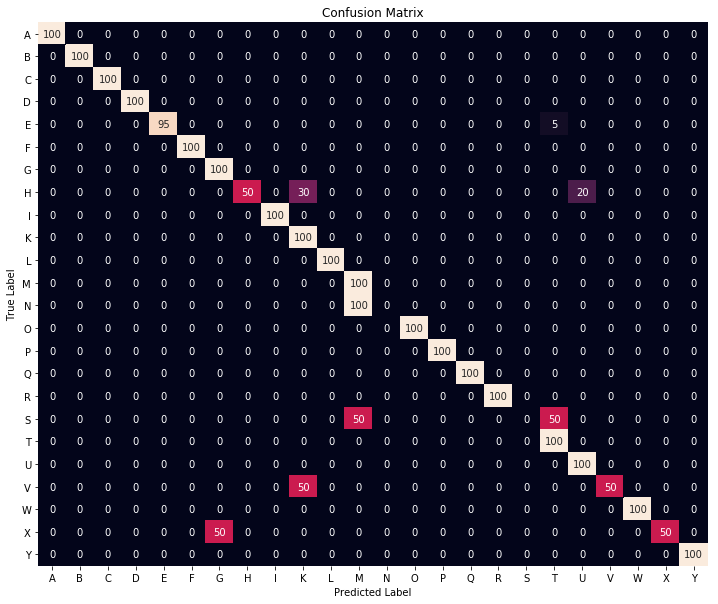

In [33]:
matrix = confusion_matrix(transformedLabelsForTest4,dfTest_pred4)
plt.figure(figsize=(12, 10))
sns.heatmap(matrix,annot=True,cbar=False, fmt='g',xticklabels=le.classes_,yticklabels=le.classes_)
plt.yticks(rotation=0)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [32]:
[i for i, j in zip(dfTest_pred4, transformedLabelsForTest4) if i != j]

[18,
 18,
 18,
 18,
 18,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 18,
